In [1]:
from matplotlib import pyplot as plt
from IPython.display import HTML
import numpy as np
from scipy import linalg
from scipy.interpolate import interp2d
from warnings import filterwarnings
import sympy

In [2]:
b1, b2, c1, c2, s = sympy.symbols('b1 b2 c1 c2 s')
B = sympy.Matrix([[0], [1]])
C = sympy.Matrix([[1, 1]])
A = sympy.Matrix([[4, 3], [2, -1]])
H = C @ sympy.Matrix.inv(s * sympy.eye(2) - A) @ B
sympy.apart(H)

Matrix([[3/(7*(s + 2)) + 4/(7*(s - 5))]])

In [12]:
A = np.array([[1/np.sqrt(2), 1], [1/np.sqrt(2), 0]]) @ np.diag([-3,4]) @ linalg.inv(np.array([[1/np.sqrt(2), 1], [1/np.sqrt(2), 0]]))

In [22]:
A = np.array([[4, 3], [2, -1]])
B = np.array([[0], [1]])
C = np.array([[1, 1]])
X,Y = np.meshgrid(np.arange(-10, 11, 1), np.arange(-10, 11, 1))
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

In [23]:
eigenvectors = 1/7*np.array([[3, -3], [1, 6]])
print(linalg.inv(eigenvectors) @ A @ eigenvectors)
print(linalg.inv(eigenvectors) @ B)
print(C @ eigenvectors)
print(4/7, 3/7)
print(linalg.inv(eigenvectors))

[[ 5.00000000e+00 -1.11022302e-16]
 [ 5.55111512e-17 -2.00000000e+00]]
[[1.]
 [1.]]
[[0.57142857 0.42857143]]
0.5714285714285714 0.42857142857142855
[[ 2.          1.        ]
 [-0.33333333  1.        ]]


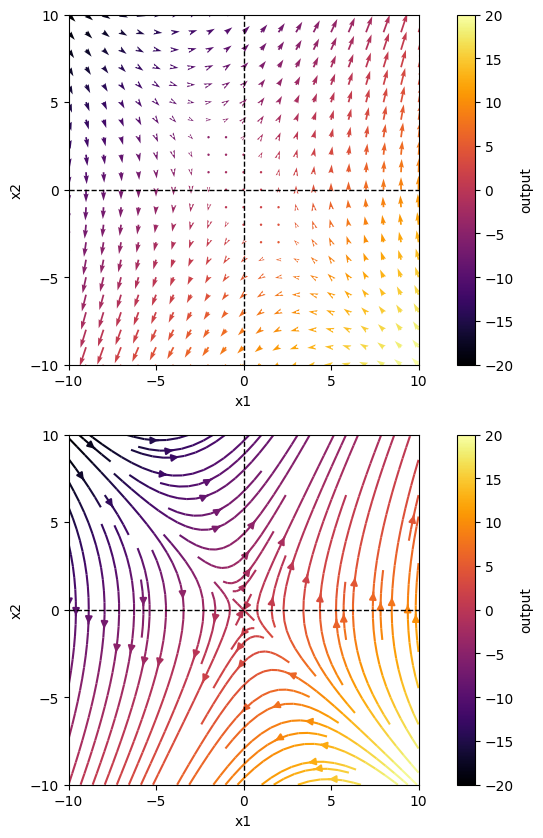

In [54]:
fig, axs = plt.subplots(2, figsize=(10, 10))
C = np.einsum('i,ijk->jk', [1,-1], np.array([X, Y]))
q = axs[0].quiver(X, Y, U, V, C, cmap='inferno', width=0.005, minshaft=0.5, minlength=1.5)
axs[1].streamplot(X, Y, U, V, cmap='inferno', color=C)
for ax in axs:
    cbar = fig.colorbar(q, ax=ax)
    cbar.set_label('output')
    ax.hlines(0, -10, 10, color='k', linestyles='--', linewidth=1)
    ax.vlines(0, -10, 10, color='k', linestyles='--', linewidth=1)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-10, 11, 5))
    ax.set_yticks(np.arange(-10, 11, 5))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
# if np.all(np.isreal(eigenvalues)):
#     for eig_val, eig_vec in zip(eigenvalues, eigenvectors.T):
#         ax.quiver(0, 0, eig_vec[0]*np.abs(eig_val), eig_vec[1]*np.abs(eig_val), angles='xy', scale_units='xy', scale=1, color='r', linewidth=2)
plt.show()
fig.savefig('phase_portrait_2.png', dpi=300)

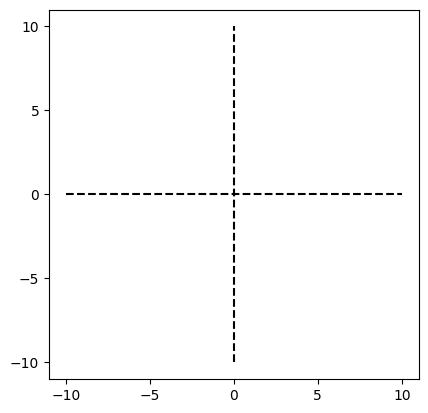

In [24]:
filterwarnings('ignore')
u_interp = interp2d(X[0], Y[:, 0], U)
v_interp = interp2d(X[0], Y[:, 0], V)

def update_point(num, point, vector, X, Y, U, V):
    """
    update point position """   

    # Calculate the direction of the vector at the current point
    direction = np.array([u_interp(point.get_xdata(), point.get_ydata()), v_interp(point.get_xdata(), point.get_ydata())])

    # Normalize the direction
    direction /= np.linalg.norm(direction)

    t = 0.5
    # Update the position of the point
    point.set_xdata(point.get_xdata() + t*direction[0])
    point.set_ydata(point.get_ydata() + t*direction[1])

    new_direction = np.array([u_interp(point.get_xdata(), point.get_ydata()), v_interp(point.get_xdata(), point.get_ydata())])
    new_direction /= np.linalg.norm(new_direction)

    # Update the position and direction of the vector
    vector.set_UVC(new_direction[0], new_direction[1])
    vector.set_offsets([point.get_xdata()[0], point.get_ydata()[0]])

    return point, vector,

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
# q = ax.quiver(X, Y, U, V, width=0.005)
# ax.streamplot(X, Y, U, V, color='k')

ax.set_aspect('equal')
ax.hlines(0, -10, 10, color='k', linestyles='--')
ax.vlines(0, -10, 10, color='k', linestyles='--')
ax.set_xticks(np.arange(-10, 11, 5))
ax.set_yticks(np.arange(-10, 11, 5))

# Create a point
point, = ax.plot([-4], [8], 'ro')
vector = ax.quiver([7], [1], [0], [0], color='r', scale=10)

# Create animation
ani = FuncAnimation(fig, update_point, frames=60, fargs=(point, vector, X, Y, U, V))

html_ani = HTML(ani.to_jshtml())
with open('html_ani.html', 'w') as f:
    f.write(html_ani.data)
html_ani

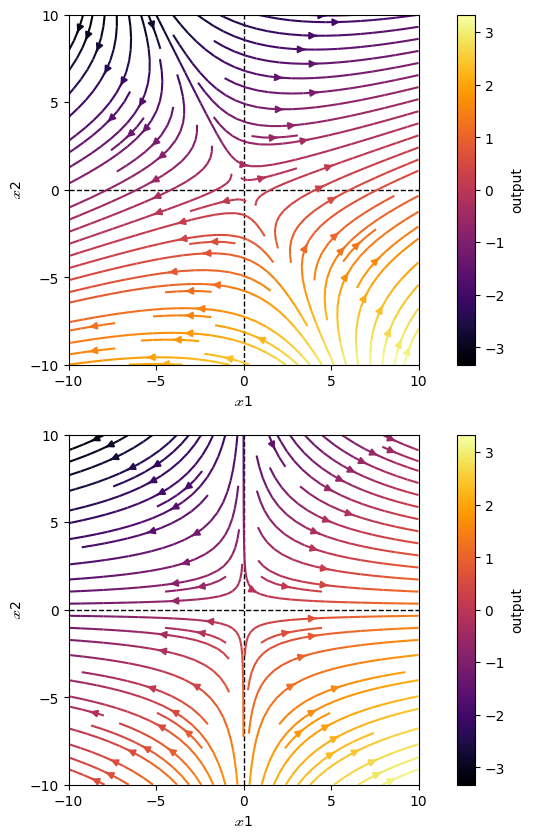

In [51]:
A = np.array([[4, 3], [2, -1]])
X,Y = np.meshgrid(np.arange(-10, 11, 1), np.arange(-10, 11, 1))
U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y
eigenvalues, eigenvectors = linalg.eig(A)

A_diag = np.diag(eigenvalues)
T = eigenvectors
A_diag = linalg.inv(T) @ A @ T

U_diag = A_diag[0,0]*X + A_diag[0,1]*Y
V_diag = A_diag[1,0]*X + A_diag[1,1]*Y

C = np.einsum('i,ijk->jk', [1,-3], np.array([X, Y]))
C_diag = np.einsum('i,ijk->jk', [1,-3] @ linalg.inv(T), np.array([X, Y]))

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].streamplot(X, Y, U, V, cmap='inferno', color=C)
axs[1].streamplot(X, Y, U_diag, V_diag, cmap='inferno', color=C_diag)
for ax in axs:
    cbar = fig.colorbar(q, ax=ax)
    cbar.set_label('output')
    ax.hlines(0, -10, 10, color='k', linestyles='--', linewidth=1, zorder=0)
    ax.vlines(0, -10, 10, color='k', linestyles='--', linewidth=1, zorder=0)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-10, 11, 5))
    ax.set_yticks(np.arange(-10, 11, 5))
    ax.set_xlabel(r'$\mathscr{x}1$')
    ax.set_ylabel(r'$\mathscr{x}2$')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
# if np.all(np.isreal(eigenvalues)):
#     for eig_val, eig_vec in zip(eigenvalues, eigenvectors.T):
#         axs[0].quiver(0, 0, eig_vec[0]*np.abs(eig_val), eig_vec[1]*np.abs(eig_val), angles='xy', scale_units='xy', scale=1, color='r', linewidth=2)
#         eig_vec_T = linalg.inv(T) @ eig_vec
#         axs[1].quiver(0, 0, eig_vec_T[0]*np.abs(eig_val), eig_vec_T[1]*np.abs(eig_val), angles='xy', scale_units='xy', scale=1, color='r', linewidth=2)
plt.show()
fig.savefig('diag.png', dpi=300)

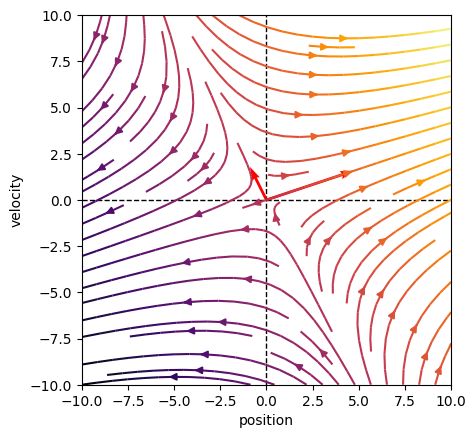

In [109]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# Create a series of scalar values that transition from 0 to 1
alphas = np.linspace(0, 1, 20)

# Create a series of intermediate matrices that gradually transition from A to A_diag
intermediate_matrices = [(1-alpha)*A + alpha*A_diag for alpha in alphas]
intermediate_eigenvecs = [(1-alpha)*eigenvectors + alpha*np.eye(2) for alpha in alphas]
intermediate_output = [(1-alpha)*C + alpha*C_diag for alpha in alphas]

# Create a streamplot for the first intermediate matrix
U = intermediate_matrices[0][0,0]*X + intermediate_matrices[0][0,1]*Y
V = intermediate_matrices[0][1,0]*X + intermediate_matrices[0][1,1]*Y
stream = ax.streamplot(X, Y, U, V, cmap='inferno')
ax.set_aspect('equal')
ax.set_xticks(np.arange(-10, 11, 5))
ax.set_yticks(np.arange(-10, 11, 5))

def update(num):
    # Update the streamplot for the current intermediate matrix
    U = intermediate_matrices[num][0,0]*X + intermediate_matrices[num][0,1]*Y
    V = intermediate_matrices[num][1,0]*X + intermediate_matrices[num][1,1]*Y
    C = intermediate_output[num]
    eig_vecs = intermediate_eigenvecs[num]
    ax.clear()
    ax.set_xlabel('position')
    ax.set_ylabel('velocity')
    ax.hlines(0, -10, 10, color='k', linestyles='--', linewidth=1, zorder=0)
    ax.vlines(0, -10, 10, color='k', linestyles='--', linewidth=1, zorder=0)    
    ax.streamplot(X, Y, U, V, density=0.8, cmap='inferno', color=C)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    for eig_val, eig_vec in zip(eigenvalues, eig_vecs.T):
        ax.quiver(0, 0, np.abs(eig_val)*eig_vec[0], np.abs(eig_val)*eig_vec[1], angles='xy', scale_units='xy', scale=1, color='r', linewidth=2)

# Create an animation of the streamplots
ani = FuncAnimation(fig, update, frames=len(alphas))

html_ani = HTML(ani.to_jshtml())
html_ani